<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/Inception_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.fashion_mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.utils import to_categorical
import cv2
from sklearn.metrics import confusion_matrix
from keras.datasets.cifar10 import load_data

170500096/170498071 [==============================] - 6s 0us/step
data loaded
(50000, 32, 32, 3)
original dim: (50000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

new dim: (50000, 75, 75, 3)


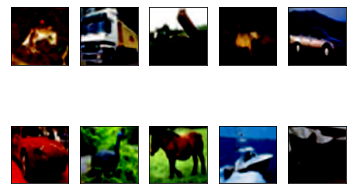

In [3]:
(xtrain, ytrain),(xtest, ytest)=load_data()
print('data loaded')

print(xtrain.shape)

def img_resize(x):
  res_x = []
  for img in x:
    res_img = cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC)
    res_x.append(res_img)
  res_x = np.array(res_x)
  res_x = preprocess_input(res_x)
  return res_x

print('original dim:', xtrain.shape)

xtrain = img_resize(xtrain)
xtest = img_resize(xtest)

print('new dim:', xtrain.shape)


# create a grid of 2x5 images for 10 classes
for i in range(0, 10):
  ax = plt.subplot(2,5,1 + i)
  plt.imshow(xtrain[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# show the plot
plt.show()

# xtrain = preprocess_input(xtrain)
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [4]:
model = Sequential()
model.add(InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.layers[0].trainable = False

model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 24,033,450
Trainable params: 2,230,666
Non-

Epoch 1/50
196/196 - 11s - loss: 1.2846 - accuracy: 0.5565 - val_loss: 0.9986 - val_accuracy: 0.6530
Epoch 2/50
196/196 - 10s - loss: 0.9778 - accuracy: 0.6551 - val_loss: 0.9403 - val_accuracy: 0.6737
Epoch 3/50
196/196 - 10s - loss: 0.8845 - accuracy: 0.6881 - val_loss: 0.9146 - val_accuracy: 0.6815
Epoch 4/50
196/196 - 10s - loss: 0.8162 - accuracy: 0.7127 - val_loss: 0.9062 - val_accuracy: 0.6810
Epoch 5/50
196/196 - 10s - loss: 0.7573 - accuracy: 0.7314 - val_loss: 0.8994 - val_accuracy: 0.6915
Epoch 6/50
196/196 - 10s - loss: 0.6941 - accuracy: 0.7518 - val_loss: 0.9073 - val_accuracy: 0.6917
Epoch 7/50
196/196 - 10s - loss: 0.6437 - accuracy: 0.7730 - val_loss: 0.9145 - val_accuracy: 0.6903
Epoch 8/50
196/196 - 10s - loss: 0.5856 - accuracy: 0.7897 - val_loss: 0.9310 - val_accuracy: 0.6916
Epoch 9/50
196/196 - 10s - loss: 0.5413 - accuracy: 0.8068 - val_loss: 0.9509 - val_accuracy: 0.6874
Epoch 10/50
196/196 - 10s - loss: 0.4957 - accuracy: 0.8232 - val_loss: 0.9723 - val_accura

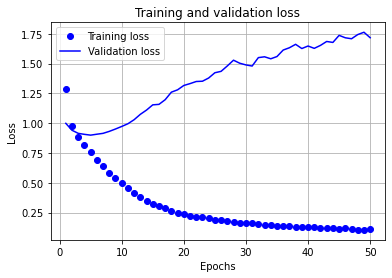

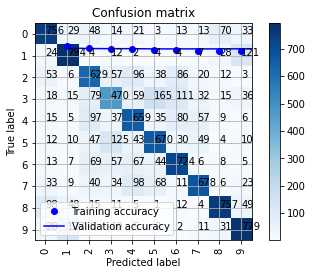

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=256, epochs=50, validation_data=(xtest, ytest), verbose=2, shuffle=True)

print(hist.history.keys())
loss = hist.history['loss']
print(np.mean(loss))
accuracy = hist.history['accuracy']
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

ypred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

cm_labels = ['0','1','2','3','4','5','6','7','8','9']
cm = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(model.predict(xtest), axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
indexes = np.arange(len(cm_labels))
for i in indexes:
  for j in indexes:
    plt.text(j, i, cm[i, j])
plt.xticks(indexes, cm_labels, rotation=90)
plt.xlabel('Predicted label')
plt.yticks(indexes, cm_labels)
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()